## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK xx : Topic </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [2]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Ragil Muhamad Ramadhan"
myNIM = "58511"

In [3]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Start: 		2023-09-21 17:53:01.904422
Device ID: 	08e6257c-586d-11ee-994e-c979de049158



---

### Dataset yang dipakai:

1. [Cheapestelectriccars-EVDatabase 2023.csv] – sumber : [https://www.kaggle.com/datasets/kkhandekar/cheapest-electric-cars]
2. [sign_mnist_test.csv] – sumber : [https://www.kaggle.com/datasets/datamunge/sign-language-mnist]

---

### Hasil kerja

#### Importing system library

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#### Importing numpy library

In [5]:
df_ori = pd.read_csv("./veriler.csv")
df_slice = df_ori[['Der(km)', 'xM']]
df = df_slice.to_numpy()


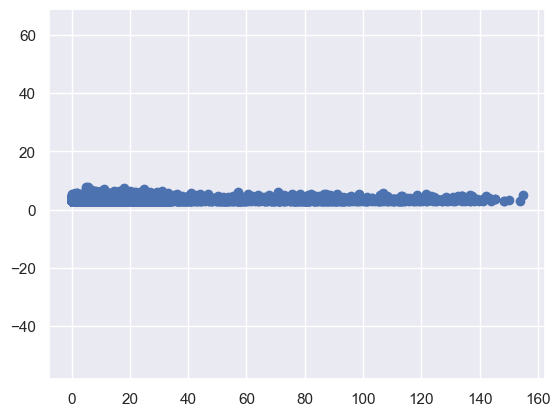

In [6]:
X = df
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [8]:
print(pca.components_)

[[ 0.99999859  0.0016765 ]
 [-0.0016765   0.99999859]]


In [9]:
print(pca.explained_variance_)

[1.58275987e+02 1.56348717e-01]


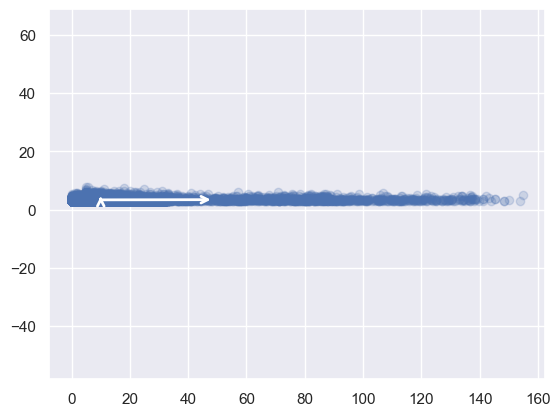

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
#plot data

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (50000, 2)
transformed shape: (50000, 1)


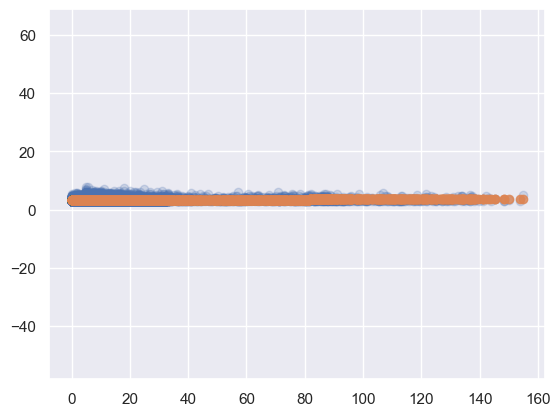

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [13]:
df2_ori = pd.read_csv("./tampan.csv")
df2 = df2_ori.to_numpy()
df2.data.shape

(10000, 785)

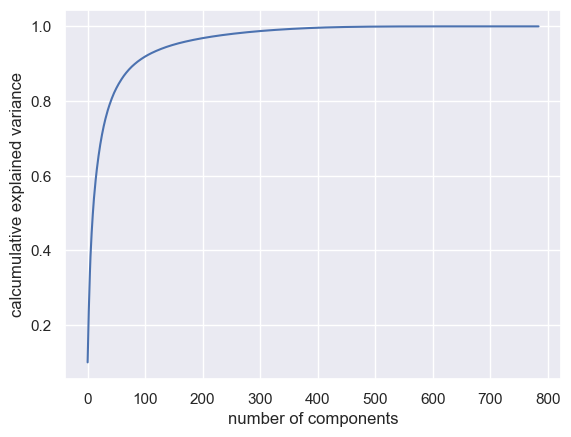

In [14]:
pca = PCA().fit(df2.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('calcumulative explained variance');

In [15]:
test_data = pd.read_csv("./tampan.csv")

In [16]:
test_label = test_data['label']
test_image = test_data.iloc[:, 1:].values

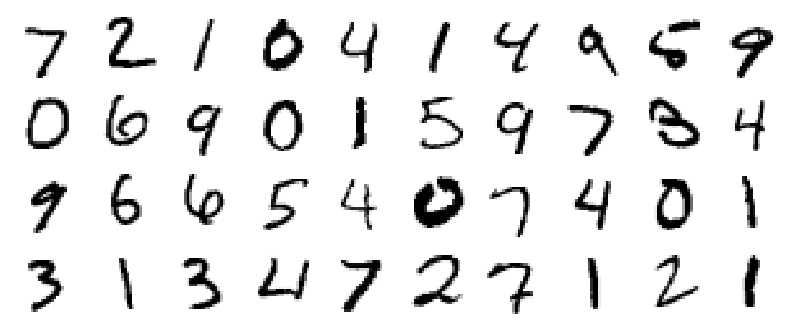

In [17]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28,28),
                cmap='binary', interpolation='nearest',
                clim=(0, 255))
        
plot_digits(test_image)

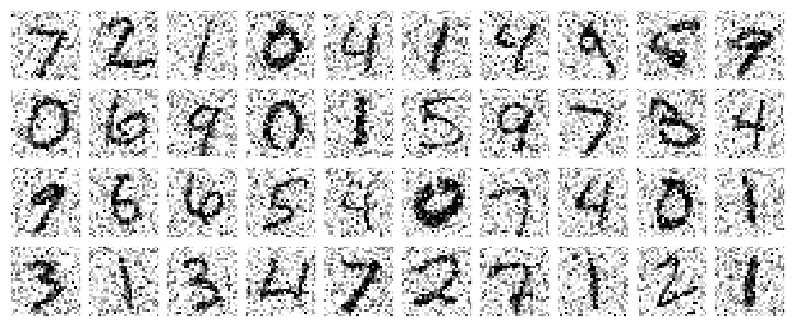

In [24]:
noisy = np.random.normal(test_image, 100)
plot_digits(noisy)

In [22]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

190

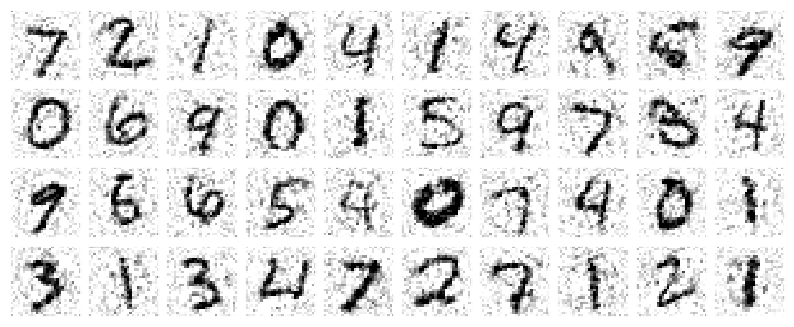

In [25]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Dataset 1
       Data akan lebih mudah dibaca dan juga mudah untuk menyimpulkan dengan menggunakan pca.
       
    - Dataset 2
        Menampilkan gambar dari dataset mnist dan memberikan efek noise ke gambar.
---

In [5]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Time-stamp:	2023-09-20 16:17:32.722700


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [6]:
!jupyter nbconvert --to html "./IF540_EL_Laporan_03_58511_RagilMuhamadRamadhan.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_EL_Laporan_03_58511_RagilMuhamadRamadhan.ipynb to html
[NbConvertApp] Writing 942816 bytes to IF540_EL_Laporan_03_58511_RagilMuhamadRamadhan.html
